In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests

# Carregar os dados do arquivo CSV
df = pd.read_excel('C:/Users/Ádamo/Downloads/Final_project_Ironhack.xlsx')

df.info()

c:\Users\Ádamo\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Espécie                228 non-null    object 
 1   Estação                228 non-null    int64  
 2   Registro               228 non-null    int64  
 3   Peso_estomacal(g)      228 non-null    float64
 4   Peso_total(g)          228 non-null    float64
 5   IRE(%)                 228 non-null    float64
 6   L50_(cm)               228 non-null    float64
 7   Comprimento_total(cm)  228 non-null    float64
 8   Latitude               228 non-null    float64
 9   ontogenia              228 non-null    object 
 10  plataforma             228 non-null    object 
 11  habitat                228 non-null    object 
 12  grauslat               228 non-null    object 
 13  Longitude              228 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 25.1+ KB


In [2]:
df

,Espécie,Estação,Registro,Peso_estomacal(g),Peso_total(g),IRE(%),L50_(cm),Comprimento_total(cm),Latitude,ontogenia,plataforma,habitat,grauslat,Longitude
0,H._plumierii,4,1,0.0148,334.0,0.004431,14.0,21.6,-9.205267,ADULTO,DENTRO,SWCR,E,26.363
1,H._aurolineatum,15,1,0.1377,61.1,0.225368,11.7,16.4,-7.779133,ADULTO,DENTRO,SAND,D,26.363
2,H._plumierii,15,1,0.1113,207.9,0.053535,14.0,18.7,-7.779133,ADULTO,DENTRO,SAND,D,26.363
3,H._aurolineatum,15,2,0.0018,36.6,0.004918,11.7,11.5,-7.779133,JUVENIL,DENTRO,SAND,D,26.363
4,H._plumierii,15,2,0.0052,108.1,0.004810,14.0,15.4,-7.779133,ADULTO,DENTRO,SAND,D,26.363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,H._plumierii,49,1,0.9757,270.0,0.361370,14.0,21.2,-8.857413,ADULTO,FORA,SWCR,E,14.889
224,H._plumierii,49,3,2.8021,245.0,1.143714,14.0,20.5,-8.857413,ADULTO,FORA,SWCR,E,14.889
225,H._aurolineatum,54,2,0.1207,74.1,0.162888,11.7,14.5,-8.806033,ADULTO,DENTRO,SWCR,E,8.007
226,H._aurolineatum,54,4,0.1148,73.4,0.156403,11.7,14.9,-8.806033,ADULTO,DENTRO,SWCR,E,31.587


Ver efeitos cofatores

In [3]:
cols = ['Peso_estomacal(g)', 'Peso_total(g)', 'IRE(%)', 'L50_(cm)', 'Comprimento_total(cm)', 'Latitude']
for col in cols:
    df[col] = df[col].apply(lambda x: float(str(x).replace(',', '.')))

In [3]:
# Verificar valores ausentes
print(df.isnull().sum())


Espécie                  0
Estação                  0
Registro                 0
Peso_estomacal(g)        0
Peso_total(g)            0
IRE(%)                   0
L50_(cm)                 0
Comprimento_total(cm)    0
Latitude                 0
ontogenia                0
plataforma               0
habitat                  0
grauslat                 0
Longitude                0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Espécie                228 non-null    object 
 1   Estação                228 non-null    int64  
 2   Registro               228 non-null    int64  
 3   Peso_estomacal(g)      228 non-null    float64
 4   Peso_total(g)          228 non-null    float64
 5   IRE(%)                 228 non-null    float64
 6   L50_(cm)               228 non-null    float64
 7   Comprimento_total(cm)  228 non-null    float64
 8   Latitude               228 non-null    float64
 9   ontogenia              228 non-null    object 
 10  plataforma             228 non-null    object 
 11  habitat                228 non-null    object 
 12  grauslat               228 non-null    object 
 13  Longitude              228 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 25.1+ KB


In [7]:
cols1 = ['Latitude', 'Longitude']
for col1 in cols1:
    df[col1] = df[col1].astype(float).astype(int)

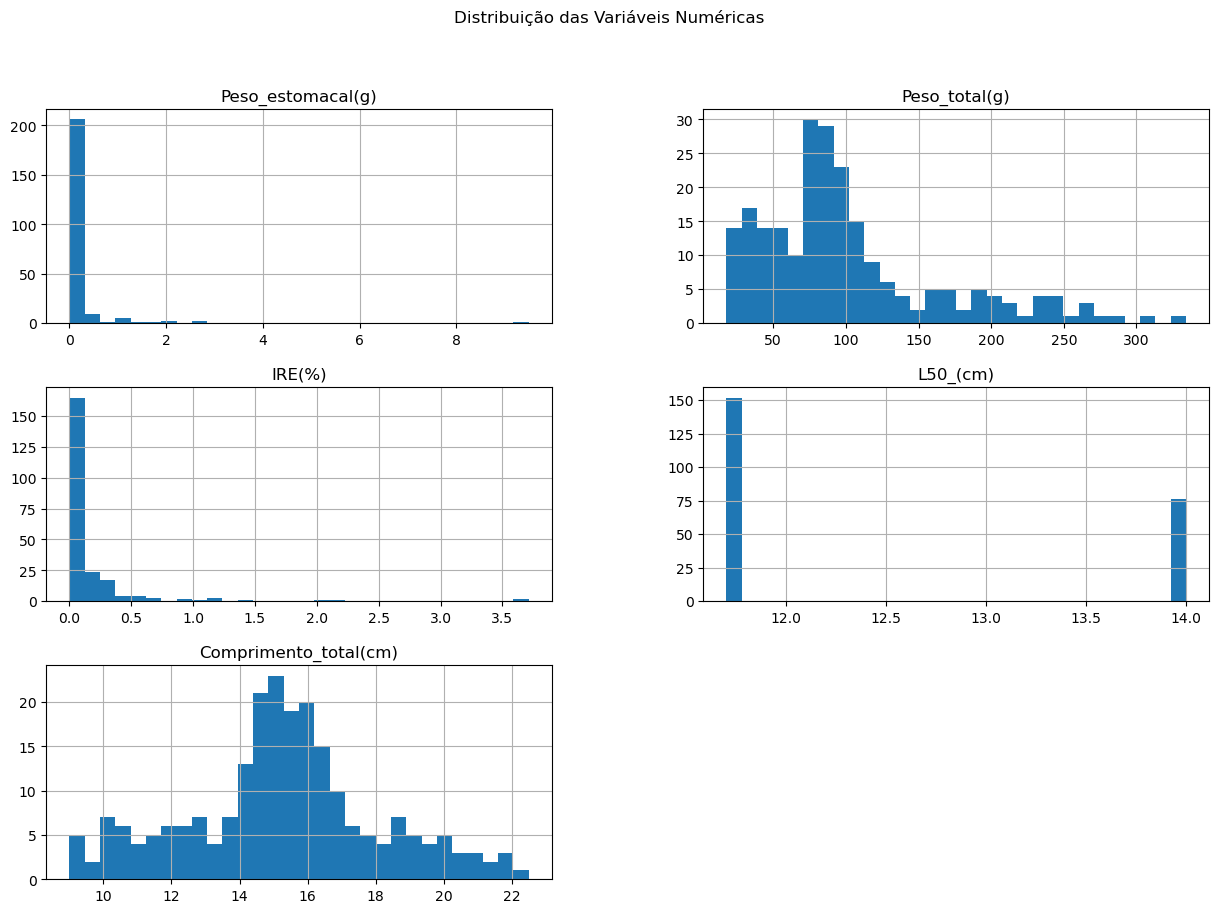

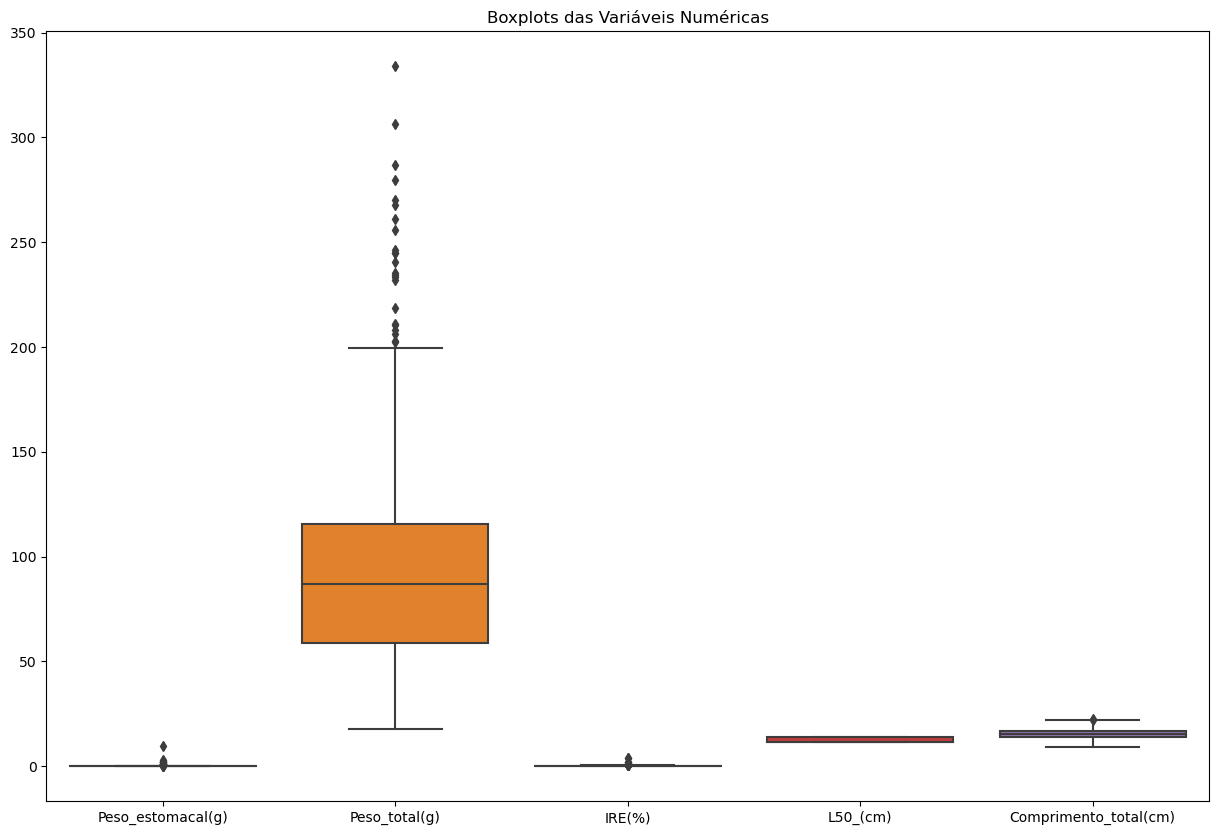

In [5]:
# Converter colunas para int 
cols = ['Peso_estomacal(g)', 'Peso_total(g)', 'IRE(%)', 'L50_(cm)', 'Comprimento_total(cm)']


# Histogramas para variáveis numéricas
df[cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribuição das Variáveis Numéricas')
plt.show()

# Boxplots para variáveis numéricas
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[cols])
plt.title('Boxplots das Variáveis Numéricas')
plt.show()

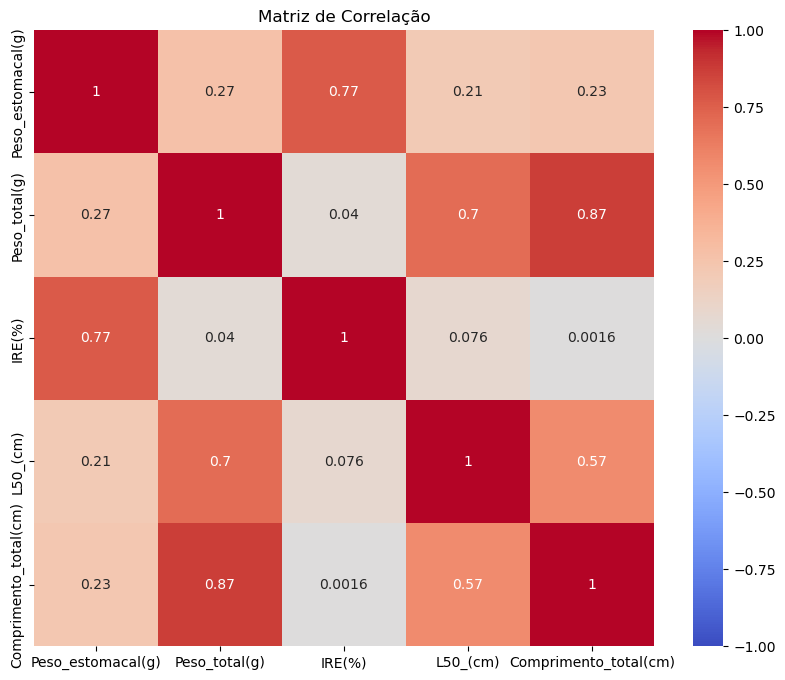

In [6]:
# Matriz de correlação
correlation_matrix = df[cols].corr()

# Heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Espécie                228 non-null    object 
 1   Estação                228 non-null    int64  
 2   Registro               228 non-null    int64  
 3   Peso_estomacal(g)      228 non-null    float64
 4   Peso_total(g)          228 non-null    float64
 5   IRE(%)                 228 non-null    float64
 6   L50_(cm)               228 non-null    float64
 7   Comprimento_total(cm)  228 non-null    float64
 8   Latitude               228 non-null    float64
 9   ontogenia              228 non-null    object 
 10  plataforma             228 non-null    object 
 11  habitat                228 non-null    object 
 12  grauslat               228 non-null    object 
 13  Longitude              228 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 25.1+ KB


                 Peso_estomacal(g)  Peso_total(g)    IRE(%)  L50_(cm)  \
Espécie                                                                 
H._aurolineatum           0.076636      69.958289  0.146835      11.7   
H._plumierii              0.396617     163.105263  0.217606      14.0   

                 Comprimento_total(cm)  
Espécie                                 
H._aurolineatum              14.088158  
H._plumierii                 17.531579  


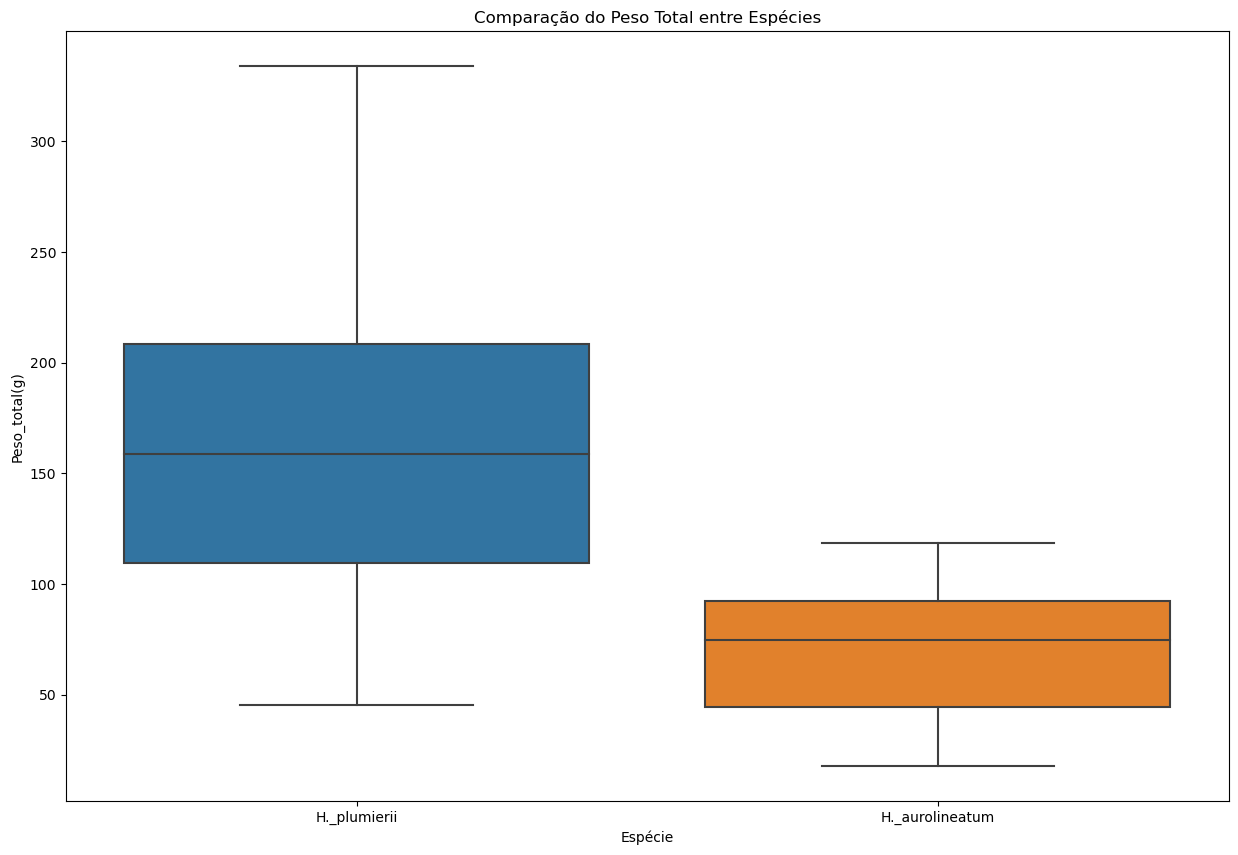

In [8]:
# Comparação de métricas entre espécies
species_groups = df.groupby('Espécie')

# Média das variáveis numéricas por espécie
species_means = species_groups[['Peso_estomacal(g)', 'Peso_total(g)', 'IRE(%)', 'L50_(cm)', 'Comprimento_total(cm)']].mean()
print(species_means)

# Boxplots para comparar espécies
plt.figure(figsize=(15, 10))
sns.boxplot(x='Espécie', y='Peso_total(g)', data=df)
plt.title('Comparação do Peso Total entre Espécies')
plt.show()

In [9]:
from scipy.stats import ttest_ind

# Separar os dados por espécie
species1 = df[df['Espécie'] == 'H._aurolineatum']['Peso_total(g)']
species2 = df[df['Espécie'] == 'H._plumierii']['Peso_total(g)']

# Verificar se os grupos têm valores suficientes
print(f'Tamanho do grupo H._aurolineatum: {len(species1)}')
print(f'Tamanho do grupo H._plumierii: {len(species2)}')

if len(species1) < 2 or len(species2) < 2:
    raise ValueError("Cada grupo deve ter pelo menos duas amostras para realizar o teste T.")



Tamanho do grupo H._aurolineatum: 152
Tamanho do grupo H._plumierii: 76


In [10]:
# Teste t
t_stat, p_value = ttest_ind(species1, species2)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: -14.595453297333785
P-value: 1.9595278936178504e-34


Esses resultados indicam que há uma diferença estatisticamente significativa entre os pesos totais das duas espécies. A média do peso total para a espécie H._aurolineatum foi de 69.53 gramas, enquanto a média para a espécie H._plumierii foi de 162.69 gramas. Isso sugere que os peixes da espécie H._plumierii tende a ter um peso total maior do que os peixes da espécie H._aurolineatum.

In [11]:
import statsmodels.api as sm

# Variáveis independentes e dependentes
X = df['Comprimento_total(cm)']
y = df['Peso_total(g)']

# Adicionar constante
X = sm.add_constant(X)

# Modelo de regressão linear
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Resumo do modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Peso_total(g)   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     706.2
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           1.76e-71
Time:                        17:28:27   Log-Likelihood:                -1106.7
No. Observations:                 228   AIC:                             2217.
Df Residuals:                     226   BIC:                             2224.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -191.78

Resumo do Modelo
Dep. Variable: Peso_total(g)
A variável dependente é o Peso Total dos peixes.

R-squared: 0.737
O coeficiente de determinação (R²) indica que aproximadamente 73.7% da variação no peso total dos peixes pode ser explicada pelo comprimento total. Este é um valor bastante alto, sugerindo um bom ajuste do modelo.

Adj. R-squared: 0.736
O R² ajustado é ligeiramente menor que o R² simples, mas ainda indica um bom ajuste do modelo.

F-statistic: 633.1
A estatística F testa a significância global do modelo. Um valor alto como este sugere que o modelo é estatisticamente significativo.

Prob (F-statistic): 1.80e-67
O valor p associado à estatística F é extremamente pequeno, indicando que é altamente improvável que o modelo seja insignificante.

Coeficientes do Modelo
const: -182.2787
Este é o intercepto do modelo. Representa o valor esperado do peso total quando o comprimento total é zero. Embora um comprimento total de zero não seja realista para peixes, o intercepto ainda faz parte da fórmula do modelo.

Comprimento_total(cm): 19.0190
Este é o coeficiente da variável comprimento total. Indica que, para cada aumento de um centímetro no comprimento total, o peso total aumenta em aproximadamente 19.02 gramas.

Estatísticas dos Coeficientes
std err: O erro padrão dos coeficientes.

Para o intercepto (const): 11.446
Para o comprimento total: 0.756
t: Estatística t para testar a hipótese nula de que o coeficiente é zero.

Para o intercepto: -15.926
Para o comprimento total: 25.162
P>|t|: Valor p para a estatística t.

Para o intercepto: 0.000
Para o comprimento total: 0.000
Os valores p para ambos os coeficientes são extremamente baixos (menores que 0.05), indicando que ambos os coeficientes são estatisticamente significativos.

[0.025 0.975]: Intervalo de confiança de 95% para os coeficientes.

Para o intercepto: de -204.833 a -159.725
Para o comprimento total: de 17.530 a 20.508
Testes de Diagnóstico
Omnibus: 19.908
Prob(Omnibus): 0.000
Jarque-Bera (JB): 63.826
Prob(JB): 1.38e-14
Esses testes (Omnibus e Jarque-Bera) são usados para testar a normalidade dos resíduos. Valores de probabilidade muito pequenos sugerem que os resíduos não são normalmente distribuídos.

Durbin-Watson: 1.185
O teste de Durbin-Watson verifica a presença de autocorrelação nos resíduos. Valores próximos de 2 indicam pouca ou nenhuma autocorrelação. Um valor de 1.185 sugere alguma autocorrelação positiva.

Conclusão
Significância do Modelo: O modelo é estatisticamente significativo com um R² alto, indicando que o comprimento total é um bom preditor do peso total dos peixes.
Significância dos Coeficientes: Ambos os coeficientes (intercepto e comprimento total) são estatisticamente significativos.
Preocupações com os Resíduos: Os testes de normalidade sugerem que os resíduos não são perfeitamente normais, e o valor do teste de Durbin-Watson sugere alguma autocorrelação nos resíduos. Isso pode indicar a necessidade de ajustes ou considerações adicionais no modelo.


In [12]:
# Renomear colunas para remover caracteres especiais
df = df.rename(columns={
    'IRE(%)': 'IRE',
    'L50_(cm)': 'L50_cm',
    'Comprimento_total(cm)': 'Comprimento_total_cm'
})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Espécie               228 non-null    object 
 1   Estação               228 non-null    int64  
 2   Registro              228 non-null    int64  
 3   Peso_estomacal(g)     228 non-null    float64
 4   Peso_total(g)         228 non-null    float64
 5   IRE                   228 non-null    float64
 6   L50_cm                228 non-null    float64
 7   Comprimento_total_cm  228 non-null    float64
 8   Latitude              228 non-null    float64
 9   ontogenia             228 non-null    object 
 10  plataforma            228 non-null    object 
 11  habitat               228 non-null    object 
 12  grauslat              228 non-null    object 
 13  Longitude             228 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 25.1+ KB


In [14]:
# Preparar os dados
scaler = StandardScaler()
X = scaler.fit_transform(df[['Peso_total(g)', 'Comprimento_total_cm', 'Peso_estomacal(g)']])

# Aplicar PCA
pca = PCA()
principal_components = pca.fit_transform(X)

# Explorar variância explicada
explained_variance_ratio = pca.explained_variance_ratio_

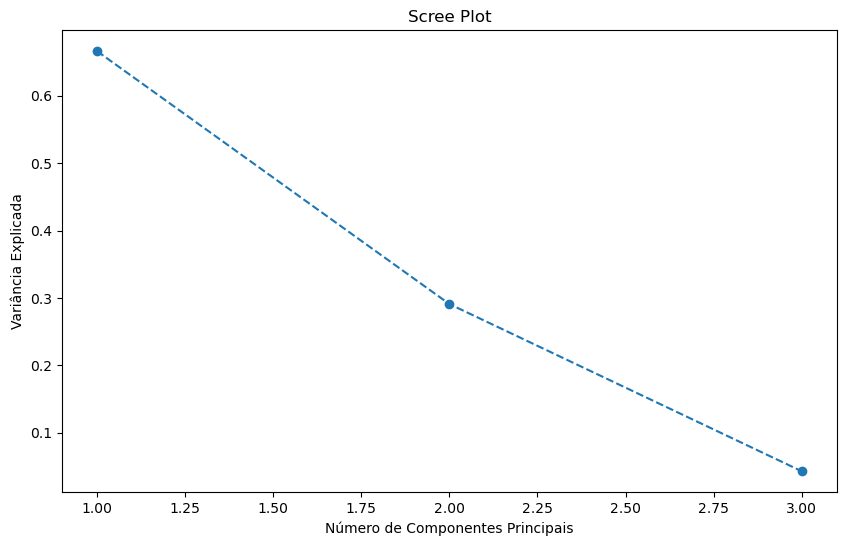

In [15]:

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada')
plt.show()

Conclusão:
Escolha dos Componentes:
A decisão final deve levar em conta o trade-off entre a simplicidade do modelo (menos componentes) e a quantidade de variância explicada (mais componentes).
Manter os dois primeiros componentes parece uma decisão razoável, pois capturam a maior parte da variação nos dados (cerca de 90%) 
Aplicar o método de elbows ante de fazer o cluster...
Gauusianmixed model alem do knmeans
substituir o anova por kruskall-wallis


In [16]:
# Loadings (coeficientes dos componentes principais)
loadings = pca.components_

# Visualização dos loadings
loadings_df = pd.DataFrame(loadings, columns=['Peso_total(g)', 'Comprimento_total_cm', 'Peso_estomacal(g)'])
print(loadings_df)


   Peso_total(g)  Comprimento_total_cm  Peso_estomacal(g)
0       0.669334              0.661979           0.337306
1      -0.212695             -0.264270           0.940703
2      -0.711866              0.701388           0.036085


In [17]:
# Selecionar o número de componentes principais que explicam a maioria da variância
n_components = 3  # Ajuste conforme necessário
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X)

# DataFrame com componentes principais
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
print(principal_df)

          PC1       PC2       PC3
0    3.871406 -1.593208 -1.076097
1   -0.174997 -0.032079  0.734374
2    1.904802 -0.774455 -0.359705
3   -1.634320  0.328338 -0.199465
4    0.030733 -0.269512 -0.048638
..        ...       ...       ...
223  3.544822 -0.097158 -0.403931
224  3.964265  2.414732 -0.202940
225 -0.485388  0.077934  0.119953
226 -0.402812  0.035638  0.225833
227 -1.062034  0.496338 -0.077040

[228 rows x 3 columns]


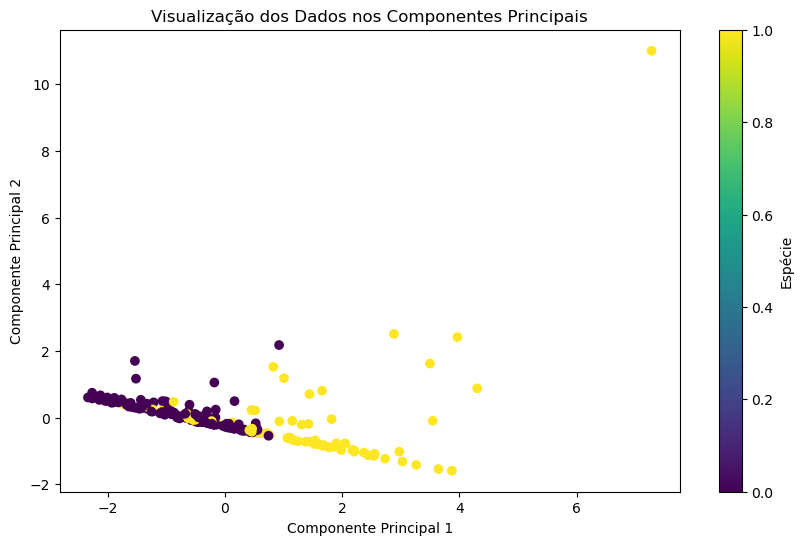

In [18]:
# Visualização dos dados nos componentes principais
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=df['Espécie'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualização dos Dados nos Componentes Principais')
plt.colorbar(label='Espécie')
plt.show()

In [24]:
from sklearn.cluster import KMeans

c:\Users\Ádamo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ádamo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ádamo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ádamo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

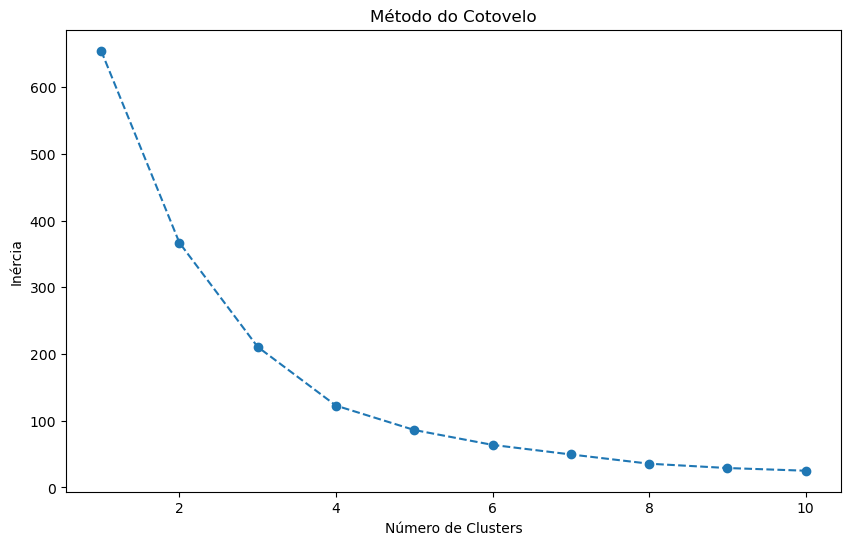

In [19]:
# Supondo que você já tenha os componentes principais no DataFrame `principal_df`
# E `principal_df` foi criado a partir da PCA, com 'PC1' e 'PC2' como componentes principais.

# Criando a lista para armazenar a inércia (soma dos erros quadrados dentro dos clusters)
inertia = []

# Definindo o intervalo de valores de k (número de clusters) a serem testados
k_range = range(1, 11)

# Aplicando K-means para cada valor de k e armazenando a inércia correspondente
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(principal_df[['PC1', 'PC2']])
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do Método do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

c:\Users\Ádamo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ádamo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


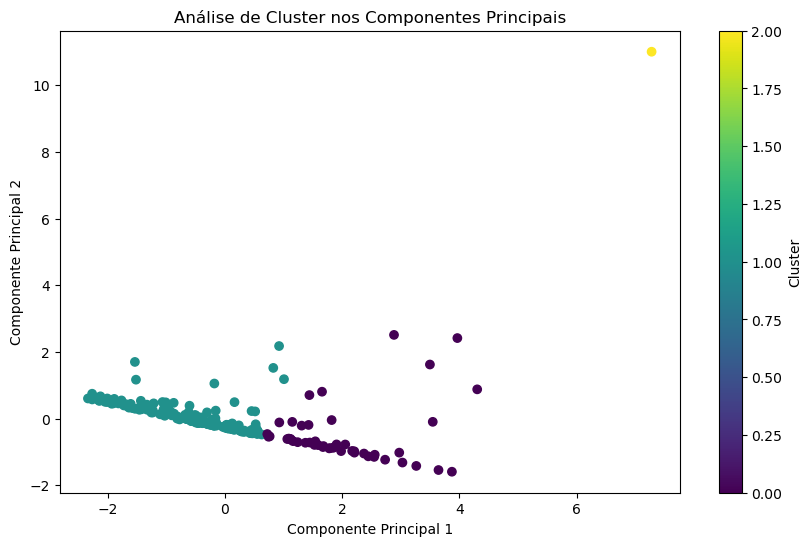

In [20]:

# Escolher o número de clusters
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(principal_df)

# Adicionar clusters ao DataFrame original
df['Cluster'] = clusters

# Visualização dos clusters nos componentes principais
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=clusters, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Análise de Cluster nos Componentes Principais')
plt.colorbar(label='Cluster')
plt.show()

c:\Users\Ádamo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ádamo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


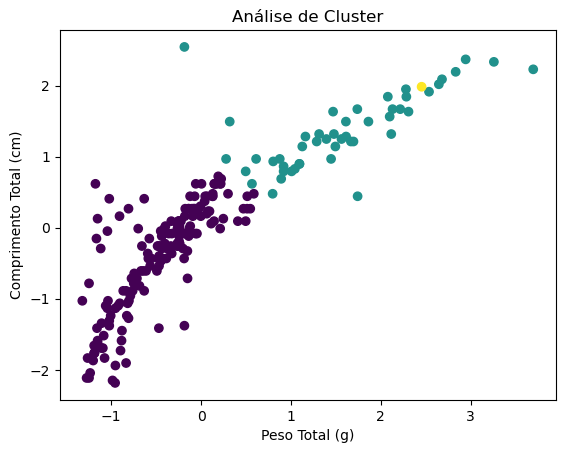

In [21]:
# Escolher número de clusters
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)

# Visualizar clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Peso Total (g)')
plt.ylabel('Comprimento Total (cm)')
plt.title('Análise de Cluster')
plt.show()

In [23]:
import pandas as pd
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests

# Inicializar lista para armazenar p-values
p_values = []

# Função para aplicar Kruskal-Wallis em diferentes grupos
def apply_kruskal_wallis(df, group_col, value_col):
    groups = [df[df[group_col] == group][value_col].dropna() for group in df[group_col].unique()]
    stat, p_value = kruskal(*groups)
    return stat, p_value

# Aplicar Kruskal-Wallis para 'Peso_total(g)'
stat, p_value = apply_kruskal_wallis(df, 'habitat', 'Peso_total(g)')
p_values.append(p_value)
print(f'Peso_total(g) - Estatística: {stat}, P-valor: {p_value}')

# Aplicar Kruskal-Wallis para 'Comprimento_Total(cm)'
stat, p_value = apply_kruskal_wallis(df, 'habitat', 'Comprimento_total_cm')
p_values.append(p_value)
print(f'Comprimento_Total(cm) - Estatística: {stat}, P-valor: {p_value}')

# Aplicar Kruskal-Wallis para 'IRE'
stat, p_value = apply_kruskal_wallis(df, 'habitat', 'IRE')
p_values.append(p_value)
print(f'IRE - Estatística: {stat}, P-valor: {p_value}')

# Aplicar Kruskal-Wallis para 'Peso_estomacal(g)'
stat, p_value = apply_kruskal_wallis(df, 'habitat', 'Peso_estomacal(g)')
p_values.append(p_value)
print(f'Peso_estomacal(g) - Estatística: {stat}, P-valor: {p_value}')

# Ajustar p-values usando Holm-Bonferroni
adjusted_pvalues = multipletests(p_values, method='holm')[1]
print("P-values ajustados:", adjusted_pvalues)

# Verificar significância ajustada
variables = ['Peso_total(g)', 'Comprimento_total_cm', 'IRE', 'Peso_estomacal(g)']
for i, p in enumerate(adjusted_pvalues):
    if p < 0.05:
        print(f"Diferença significativa encontrada em {variables[i]}.")
    else:
        print(f"Nenhuma diferença significativa encontrada em {variables[i]}.")


Peso_total(g) - Estatística: 41.90935361157707, P-valor: 4.193822013696307e-09
Comprimento_Total(cm) - Estatística: 40.16233794661477, P-valor: 9.843385300715033e-09
IRE - Estatística: 13.199240455275941, P-valor: 0.004224961559385296
Peso_estomacal(g) - Estatística: 12.957837384744277, P-valor: 0.004728677365220364
P-values ajustados: [1.67752881e-08 2.95301559e-08 8.44992312e-03 8.44992312e-03]
Diferença significativa encontrada em Peso_total(g).
Diferença significativa encontrada em Comprimento_total_cm.
Diferença significativa encontrada em IRE.
Diferença significativa encontrada em Peso_estomacal(g).


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Espécie               228 non-null    object 
 1   Estação               228 non-null    int64  
 2   Registro              228 non-null    int64  
 3   Peso_estomacal(g)     228 non-null    float64
 4   Peso_total(g)         228 non-null    float64
 5   IRE                   228 non-null    float64
 6   L50_cm                228 non-null    float64
 7   Comprimento_total_cm  228 non-null    float64
 8   Latitude              228 non-null    float64
 9   ontogenia             228 non-null    object 
 10  plataforma            228 non-null    object 
 11  habitat               228 non-null    object 
 12  grauslat              228 non-null    object 
 13  Longitude             228 non-null    float64
 14  Cluster               228 non-null    int32  
dtypes: float64(7), int32(1)

In [32]:
# Ajusta a precisão das colunas para garantir que mantenham casas decimais
df['Latitude'] = df['Latitude'].round(6)
df['Longitude'] = df['Longitude'].round(6)

In [25]:
df

,Espécie,Estação,Registro,Peso_estomacal(g),Peso_total(g),IRE,L50_cm,Comprimento_total_cm,Latitude,ontogenia,plataforma,habitat,grauslat,Longitude,Cluster
0,H._plumierii,4,1,0.0148,334.0,0.004431,14.0,21.6,-9.205267,ADULTO,DENTRO,SWCR,E,26.363,0
1,H._aurolineatum,15,1,0.1377,61.1,0.225368,11.7,16.4,-7.779133,ADULTO,DENTRO,SAND,D,26.363,1
2,H._plumierii,15,1,0.1113,207.9,0.053535,14.0,18.7,-7.779133,ADULTO,DENTRO,SAND,D,26.363,0
3,H._aurolineatum,15,2,0.0018,36.6,0.004918,11.7,11.5,-7.779133,JUVENIL,DENTRO,SAND,D,26.363,1
4,H._plumierii,15,2,0.0052,108.1,0.004810,14.0,15.4,-7.779133,ADULTO,DENTRO,SAND,D,26.363,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,H._plumierii,49,1,0.9757,270.0,0.361370,14.0,21.2,-8.857413,ADULTO,FORA,SWCR,E,14.889,0
224,H._plumierii,49,3,2.8021,245.0,1.143714,14.0,20.5,-8.857413,ADULTO,FORA,SWCR,E,14.889,0
225,H._aurolineatum,54,2,0.1207,74.1,0.162888,11.7,14.5,-8.806033,ADULTO,DENTRO,SWCR,E,8.007,1
226,H._aurolineatum,54,4,0.1148,73.4,0.156403,11.7,14.9,-8.806033,ADULTO,DENTRO,SWCR,E,31.587,1
